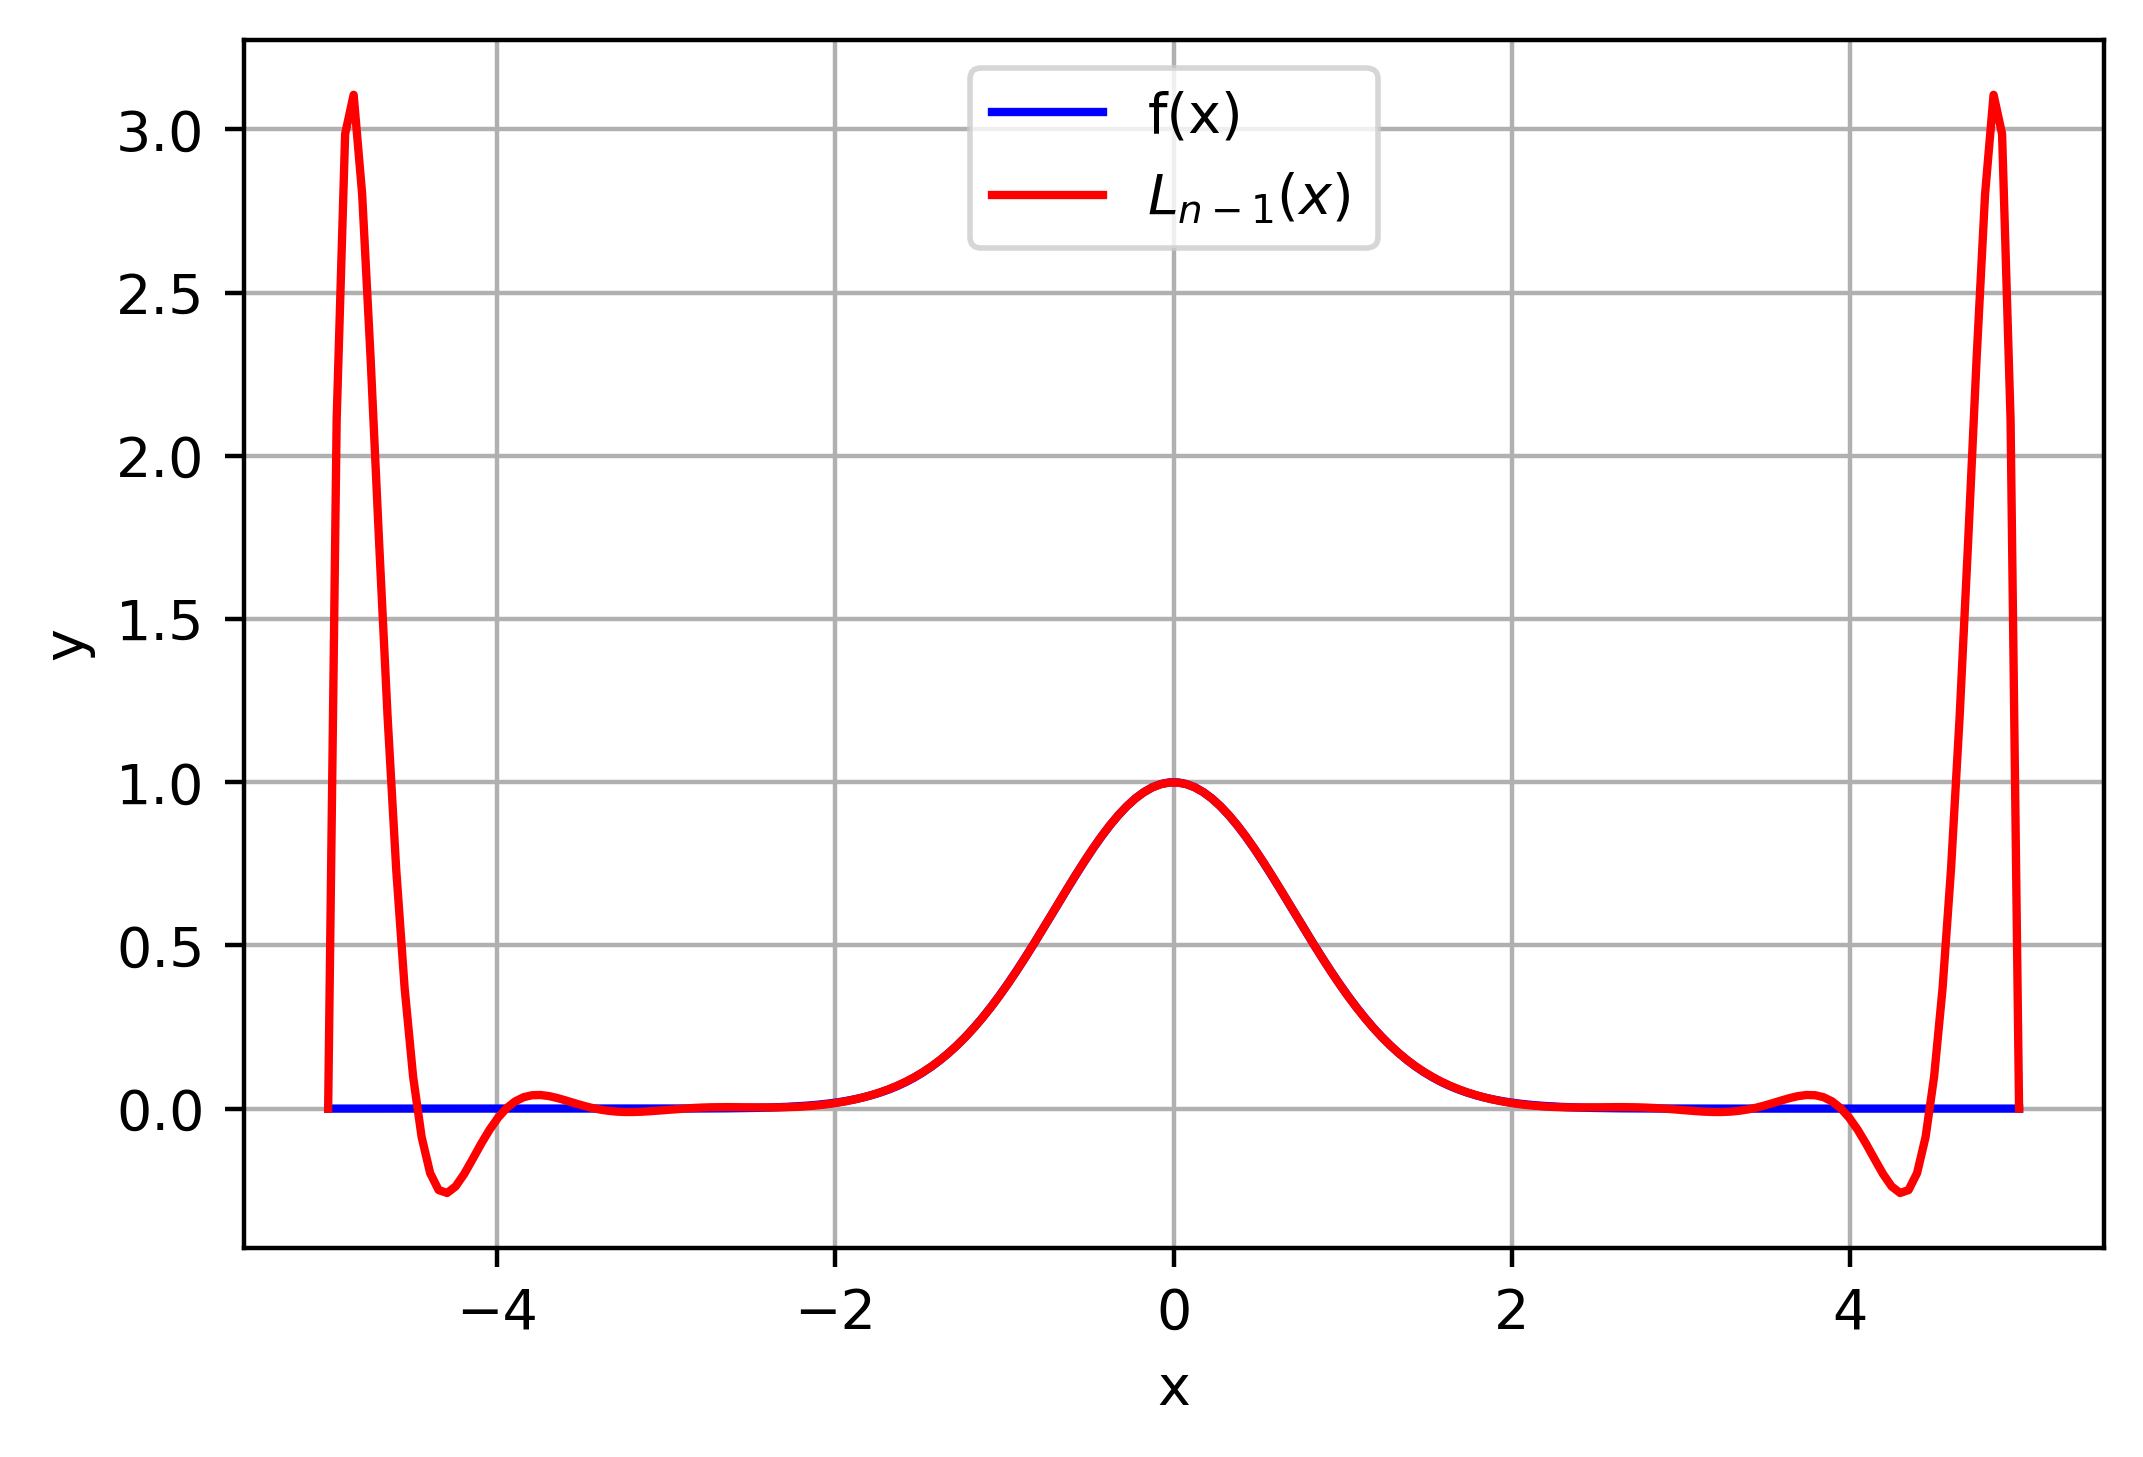

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

min_v = -5
max_v = 5
N = 20
x = np.linspace(min_v, max_v, 200)
x_nodes = np.linspace(min_v, max_v, N)

def f(x):
    return np.exp(-x**2)

def l_i(i, x, x_nodes):
    n = len(x_nodes)
    l = 1
    for j in range(n):
        if j != i:
            l = l * (x - x_nodes[j])/(x_nodes[i] - x_nodes[j])
    return(l)

def L(x, x_nodes, y_nodes):
    rez = 0
    for i in range(len(x_nodes)):
            rez = rez + y_nodes[i] * l_i(i, x, x_nodes)
    return(rez)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)

axes.plot(x, f(x), 'b-', label='f(x)')
axes.plot(x, L(x, x_nodes, f(x_nodes)), 'r-', label='$L_{n-1}(x)$ ')
 
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(loc="upper center")
 
axes.grid()
plt.show()





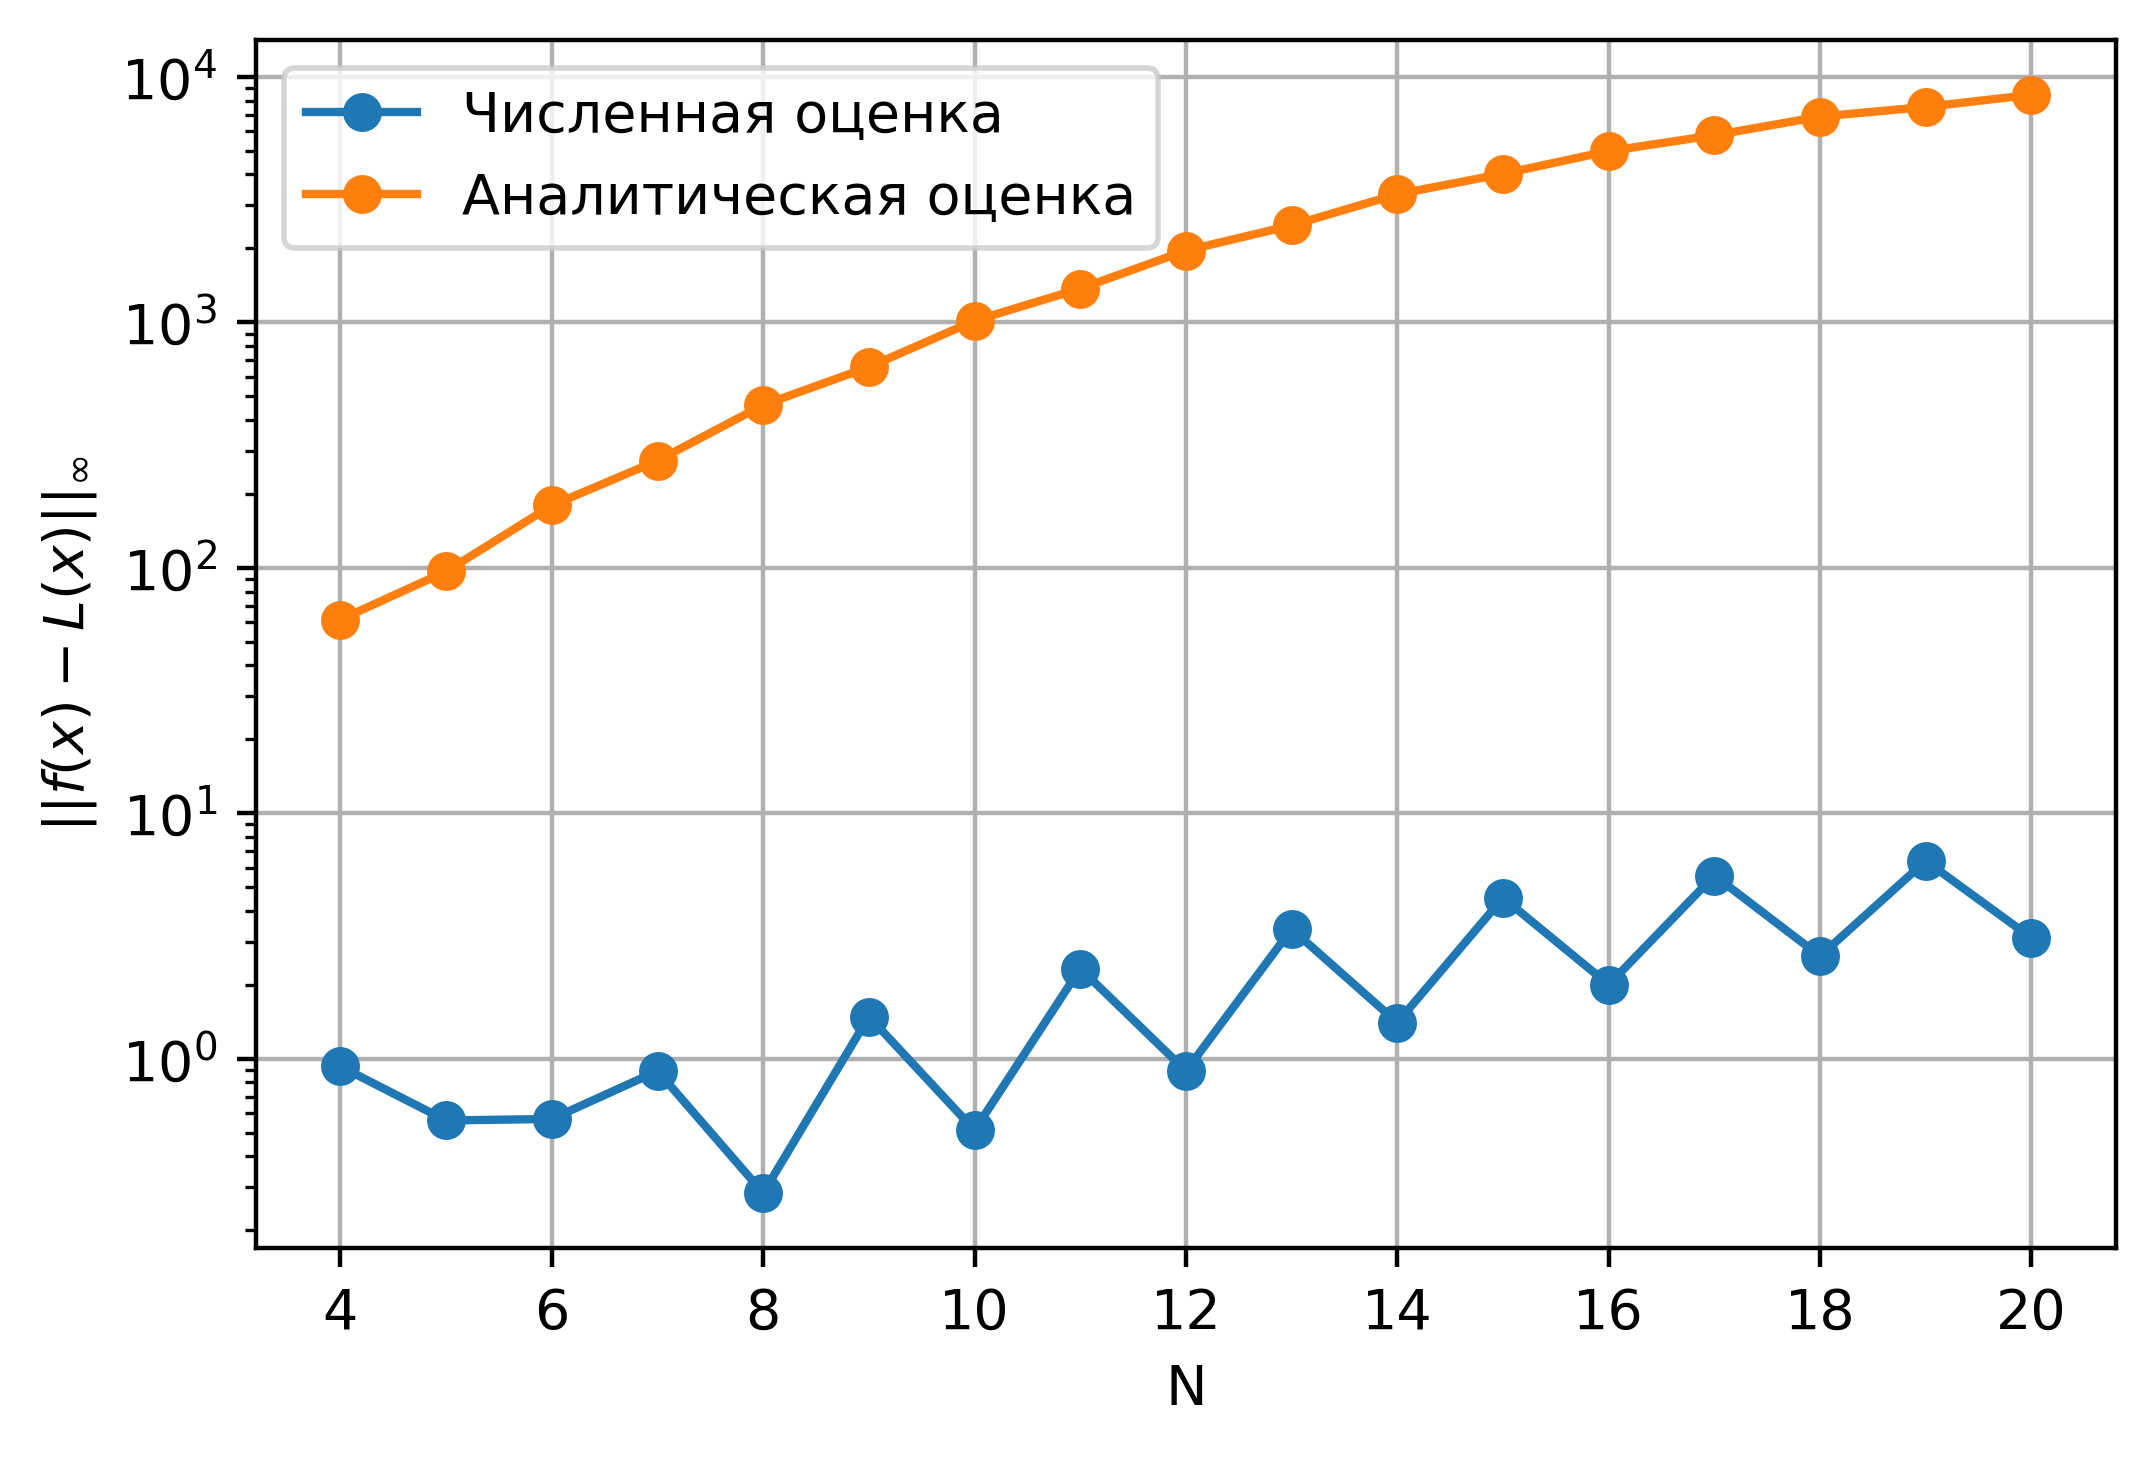

In [88]:
'''3bc'''
def max_dist(x_nodes, func):
    y_real = f(x)
    y_polinom = func(x, x_nodes, f(x_nodes))
    return np.max(np.abs(y_real - y_polinom))

def der(n):
    summ = 0
    if n <= 1:
        summ = 1
    for k in range(int(n/2) + 1):
        summ = summ + ((-4)**(-k) * x**(-2*k)) / (np.math.factorial(k) * np.math.factorial(-2*k+n))
    analitic_asses = 2**n * np.exp(-x**2) * (-x)**n * np.math.factorial(n) * summ
    return(analitic_asses)

x_vec = np.linspace(-5, 5, 200)
max_d_arr = []
for i in range(4, 21):
    max_d_arr.append(np.max(np.abs(der(i))))
    
def compare(max_d, n, x):
    x_nodes = np.linspace(-5, 5, n)
    multipl = 1
    for x_i in x_nodes:
        multipl *= (x - x_i)
    multipl *= max_d / np.math.factorial(n) 
    return multipl

n_arr = np.arange(4, 21, 1)
dist = np.array([max_dist(np.linspace(-5, 5, n), L) for n in n_arr])
anal_dist = [np.max(np.abs(compare(max_d_arr[i - 4], i, x_vec))) for i in range(4, 21)]

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.semilogy(n_arr, dist, '-o', label='Численная оценка')
axes.semilogy(n_arr, anal_dist, '-o', label='Аналитическая оценка')
 
axes.set_xlabel('N')
axes.set_ylabel('$||f(x) - L(x)||_{∞}$')
axes.legend(loc="best")
axes.grid()
 
plt.show()


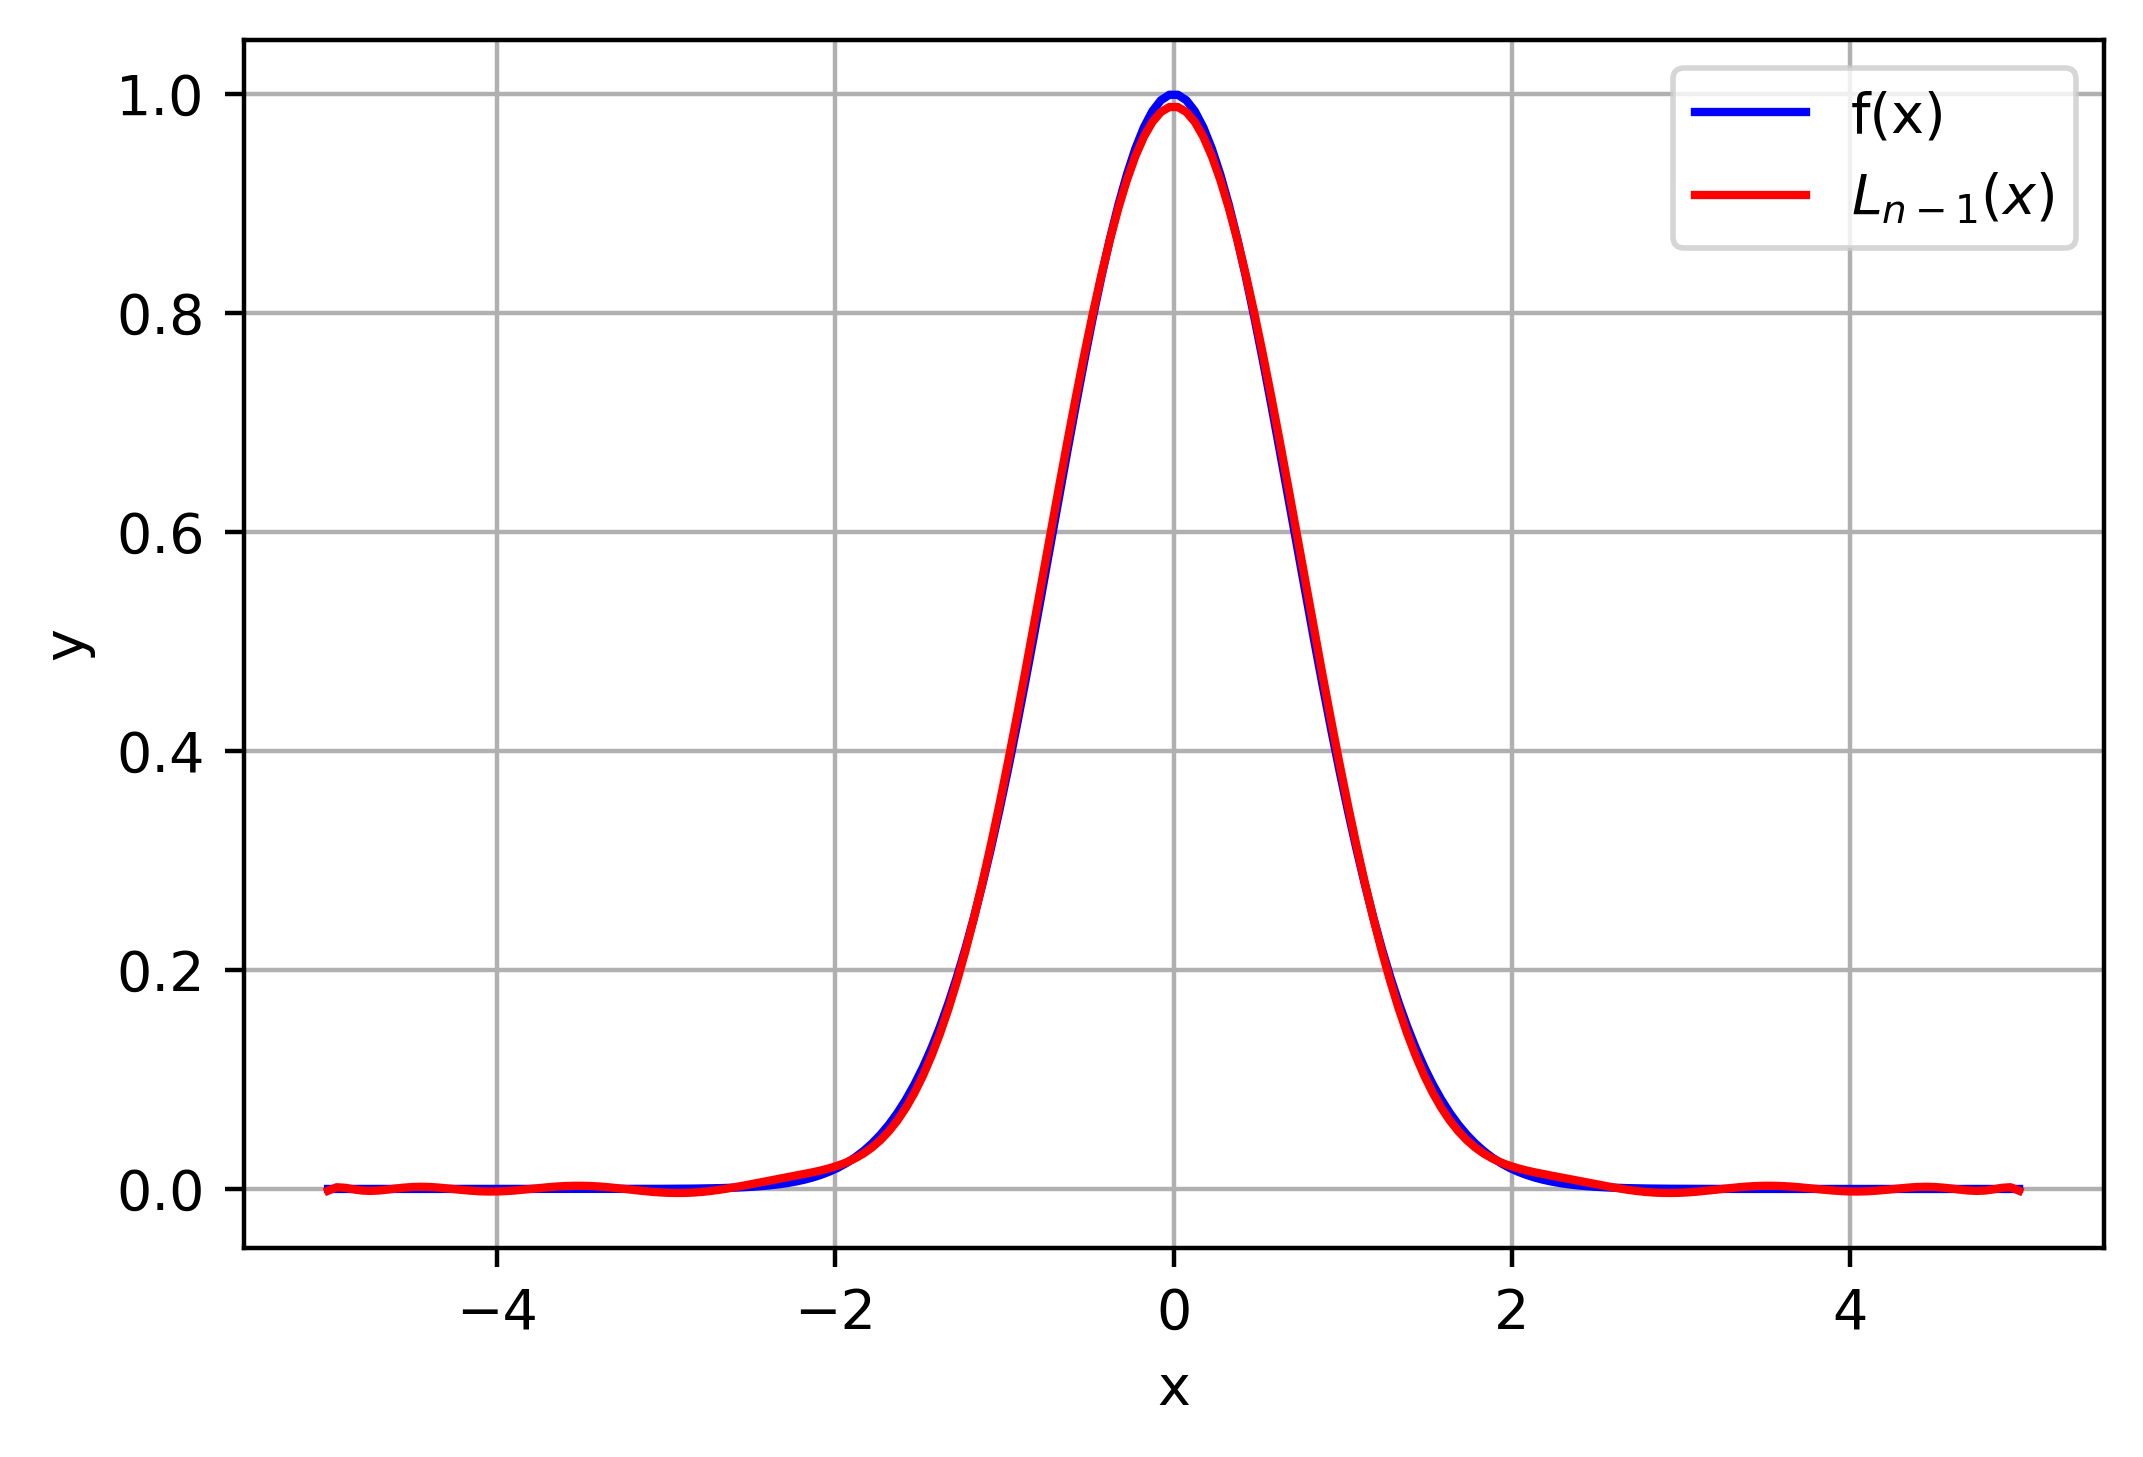

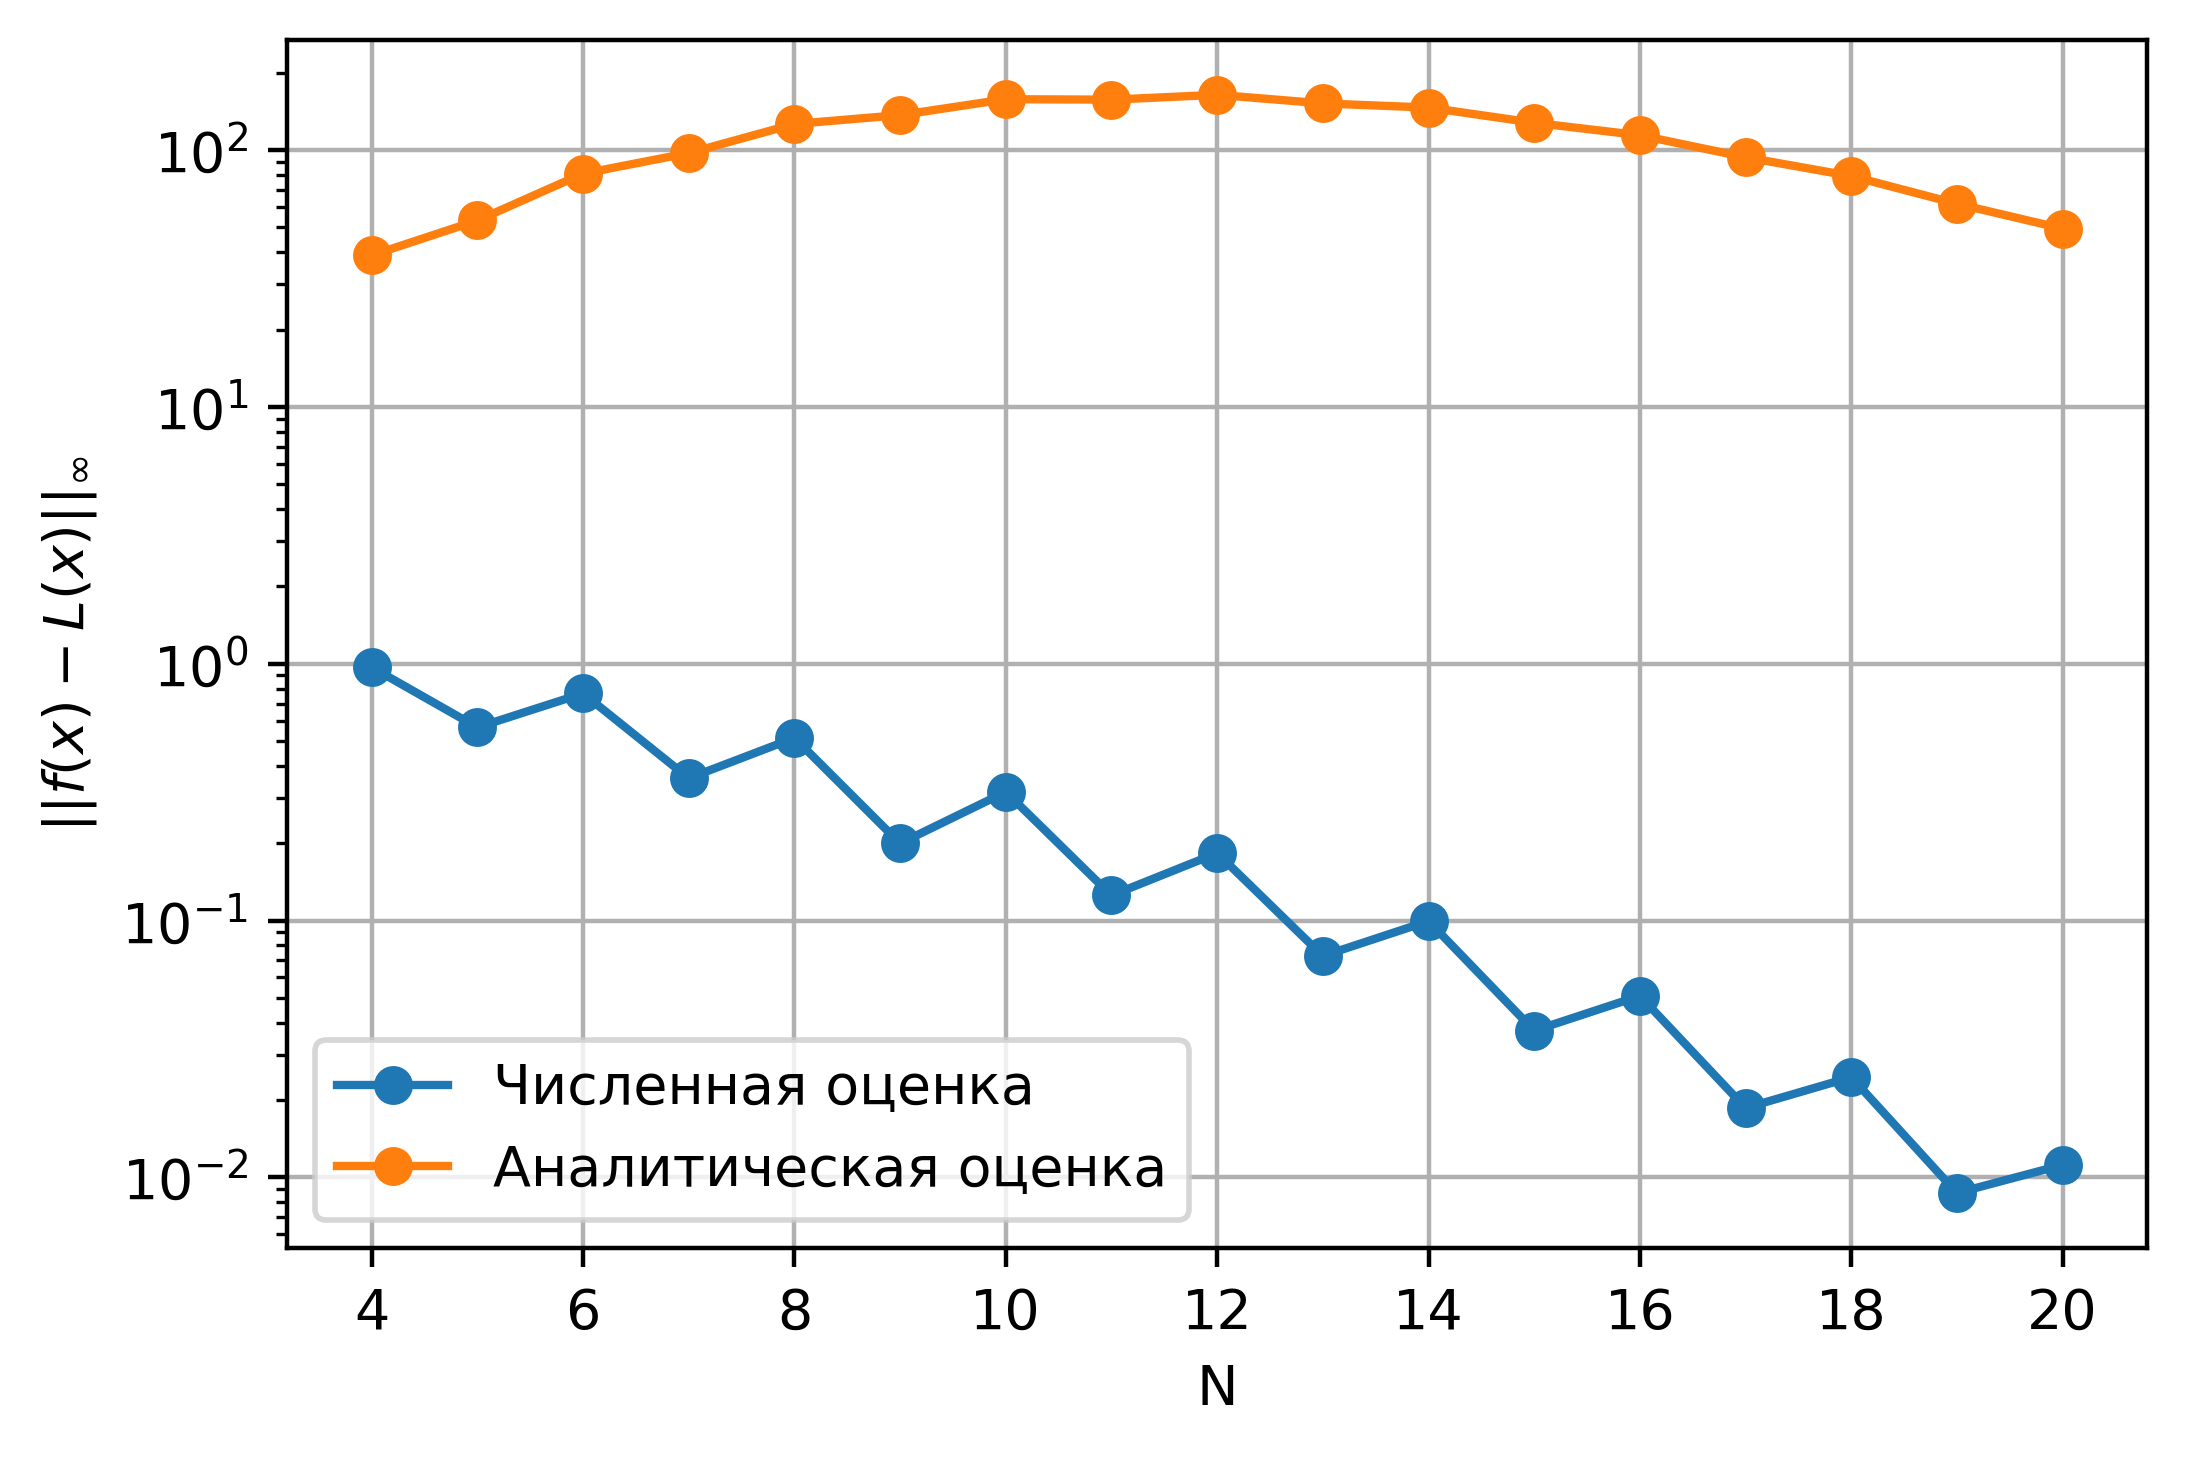

In [89]:
"""Пункт 4.1"""
def node_generate(a, b, n):
    opt_nodes = []
    for i in range(1,n+1):
        xi = np.cos(np.pi * (2*i-1) / (2*n))
        x = 1/2 * ((a-b) * xi + a + b)
        opt_nodes.append(x)
    return np.array(opt_nodes)

n_arr_g = node_generate(-5,5,20)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.plot(x, f(x), 'b-', label='f(x)')
axes.plot(x, L(x, n_arr_g, f(n_arr_g)), 'r-', label='$L_{n-1}(x)$')
 
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(loc="best")
 
axes.grid()
plt.show()

def compare_opt(max_d, n):
    rez = max_d * 10**n / (np.math.factorial(n) * 2**(2*n-1))
    return rez

n_arr = np.arange(4, 21, 1)
dist_opt = np.array([max_dist(node_generate(-5,5,n), L) for n in n_arr])
anal_dist = [np.max(np.abs(compare_opt(max_d_arr[i - 4], i))) for i in range(4, 21)]

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.semilogy(n_arr, dist_opt, '-o', label='Численная оценка')
axes.semilogy(n_arr, anal_dist, '-o', label='Аналитическая оценка')
 
axes.set_xlabel('N')
axes.set_ylabel('$||f(x) - L(x)||_{∞}$')
axes.legend(loc="best")

axes.grid() 
plt.show()

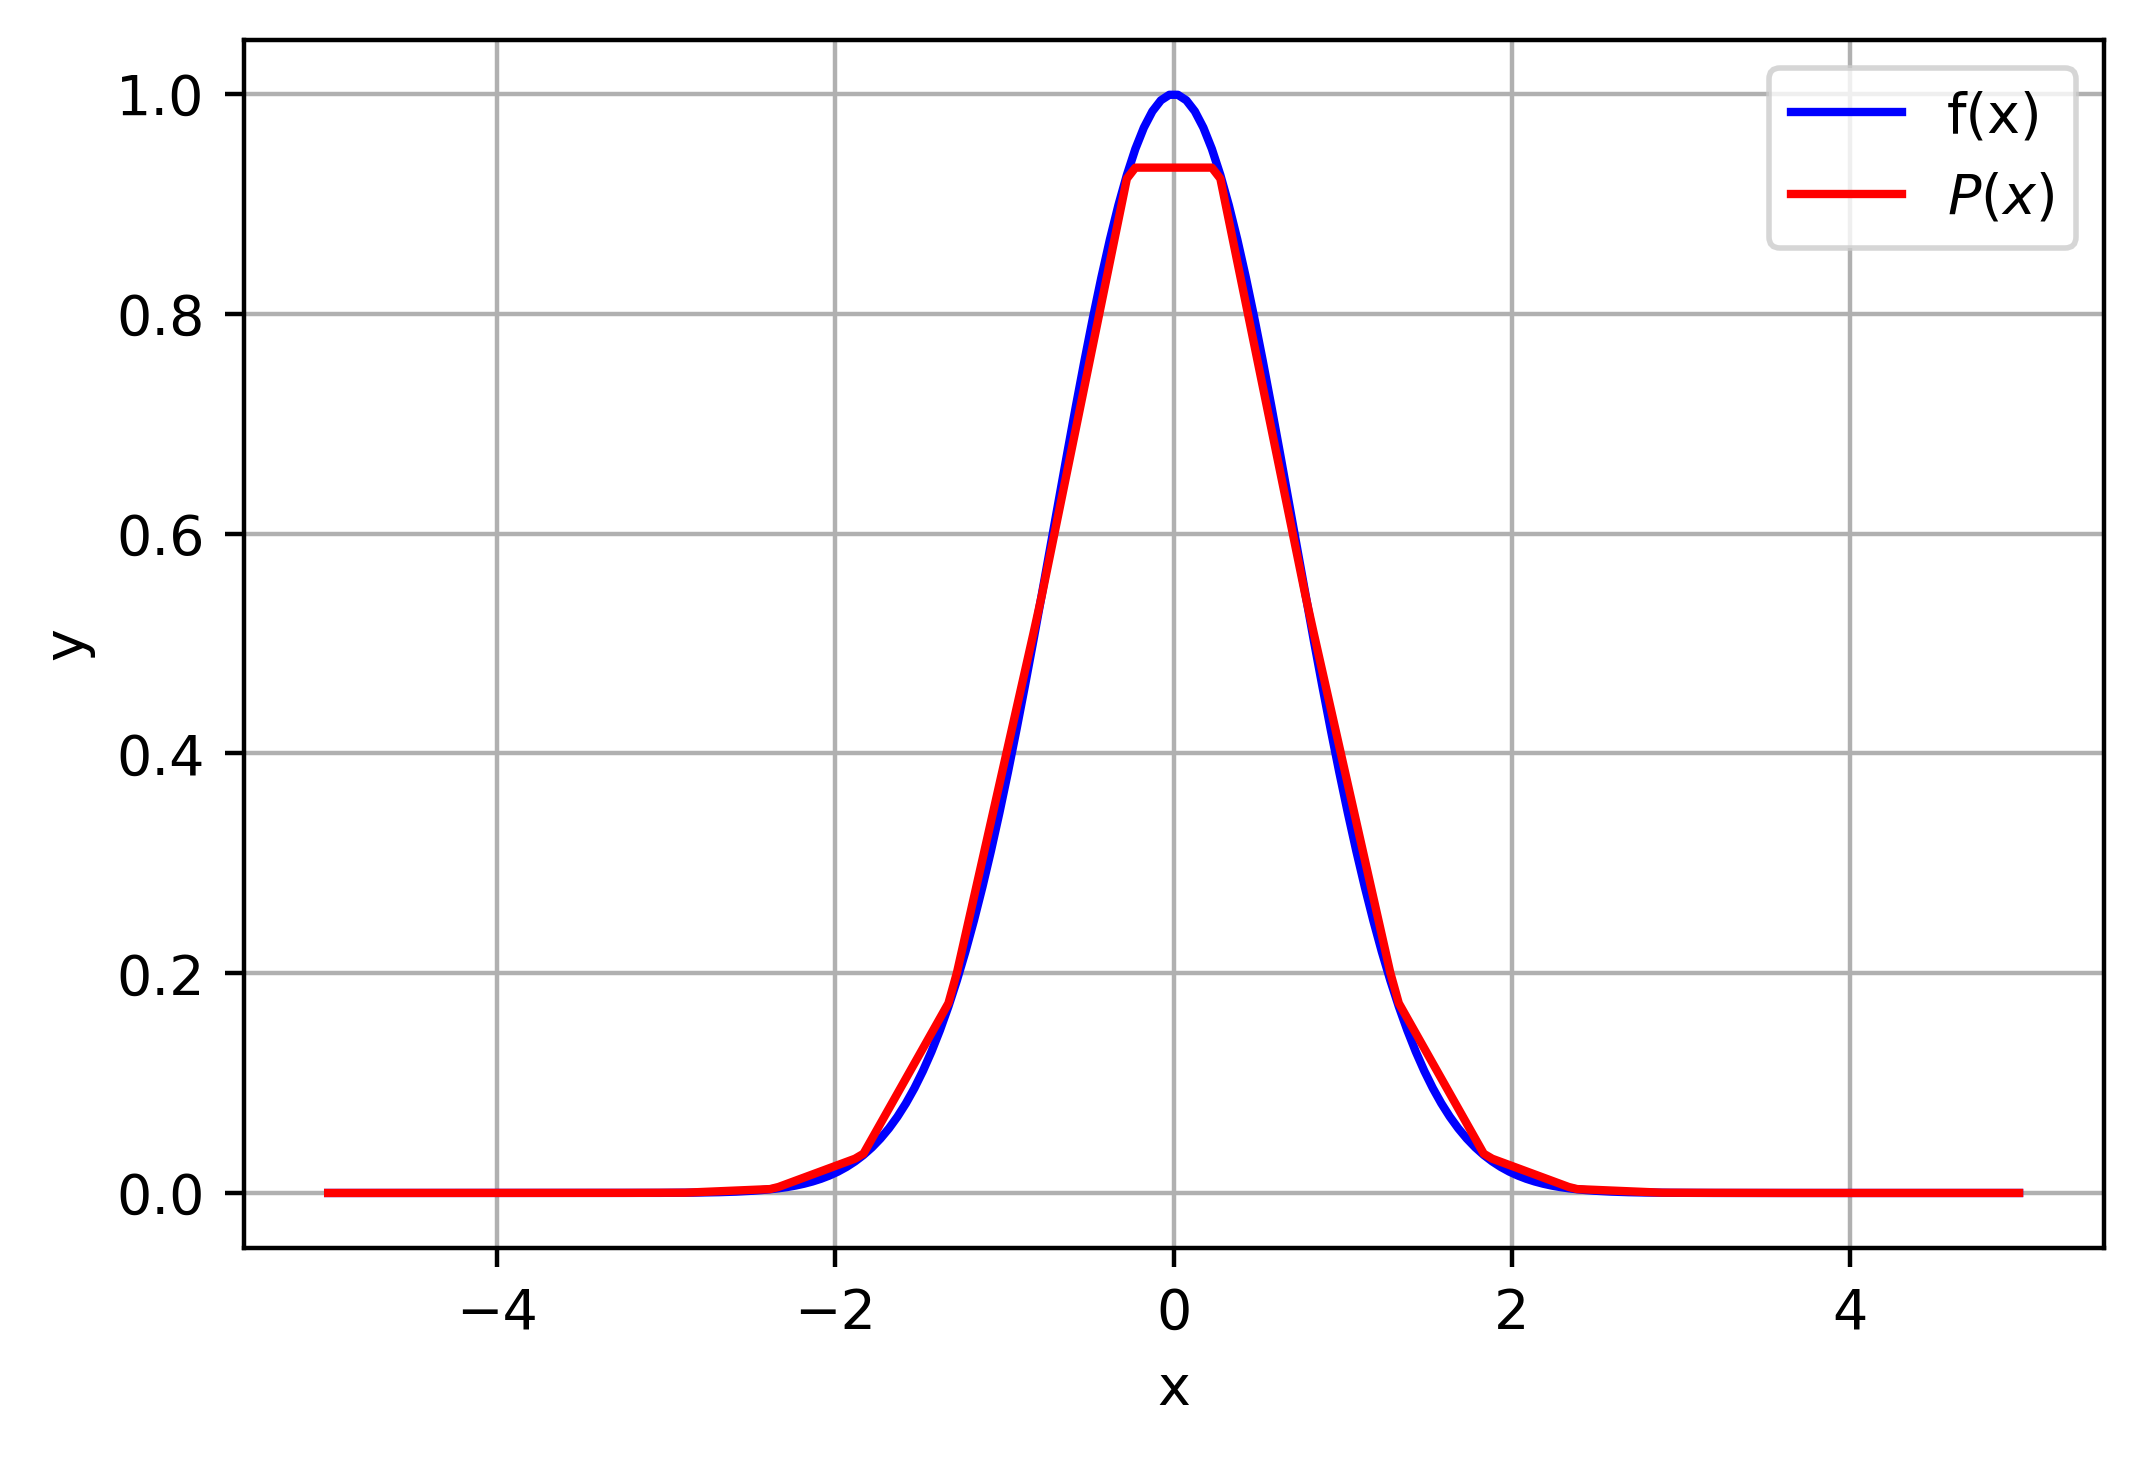

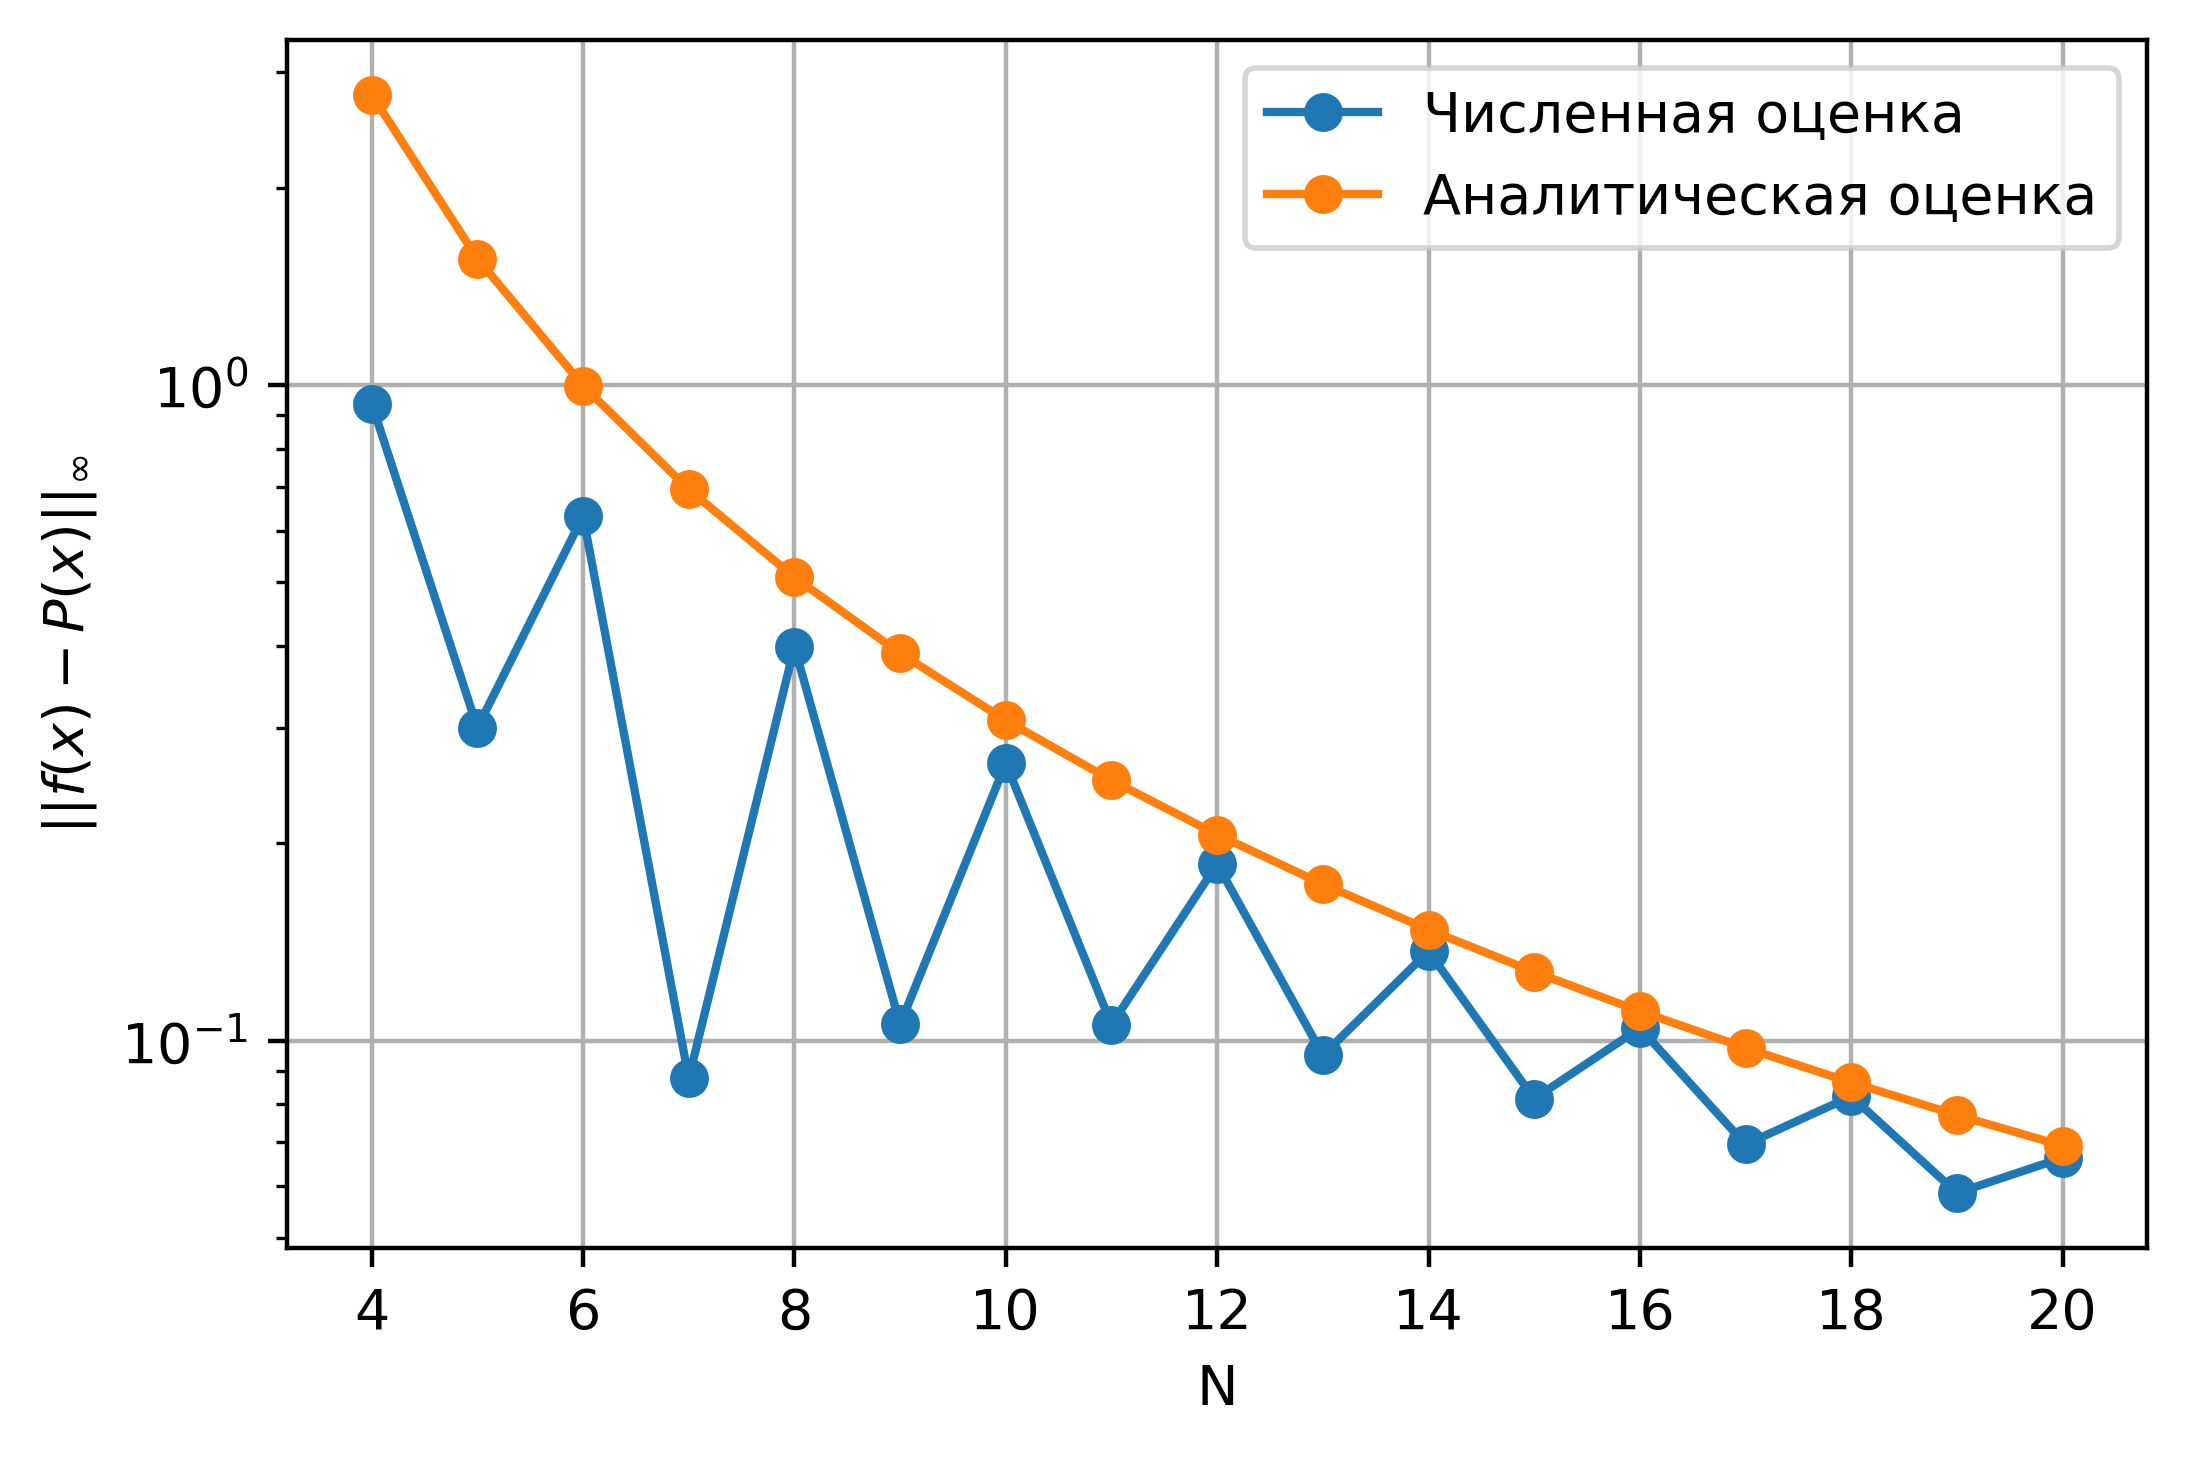

In [90]:
"""Пункт 4.2"""

def ind_kl(x,a,b,n):
    h = (b - a) / (n-1)
    i = int((x - a) / h)
    if i != n-1:
        return i
    else:
        return i-1

def L_kl(x, x_nodes, y_nodes):
    rez = []
    for j in range(len(x)):
        i = ind_kl(x[j], x_nodes[0], x_nodes[-1], len(x_nodes))
        rez.append(y_nodes[i] + ((y_nodes[i+1] - y_nodes[i]) / (x_nodes[i+1] - x_nodes[i])) * (x[j] - x_nodes[i]))
    return np.array(rez)

x_nodes = np.linspace(-5, 5, 20)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.plot(x, f(x), 'b-', label='f(x)')
axes.plot(x, L_kl(x, x_nodes, f(x_nodes)), 'r-', label='$P(x)$')
 
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend(loc="best")
 
axes.grid()
plt.show()

max_d = (np.max(np.abs(der(2))))

def compare_opt(max_d, a, b, n):
    h = (b - a) / (n-1)
    rez = max_d * h**2 / 8 
    return rez

n_arr = np.arange(4, 21, 1)
dist_kl = np.array([max_dist(np.linspace(-5,5,n), L_kl) for n in n_arr])
anal_dist = [compare_opt(max_d, x_nodes[0], x_nodes[-1], i) for i in range(4, 21)]

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.semilogy(n_arr, dist_kl, '-o', label='Численная оценка')
axes.semilogy(n_arr, anal_dist, '-o', label='Аналитическая оценка')
 
axes.set_xlabel('N')
axes.set_ylabel('$||f(x) - P(x)||_{∞}$')
axes.legend(loc="best")

axes.grid() 
plt.show()

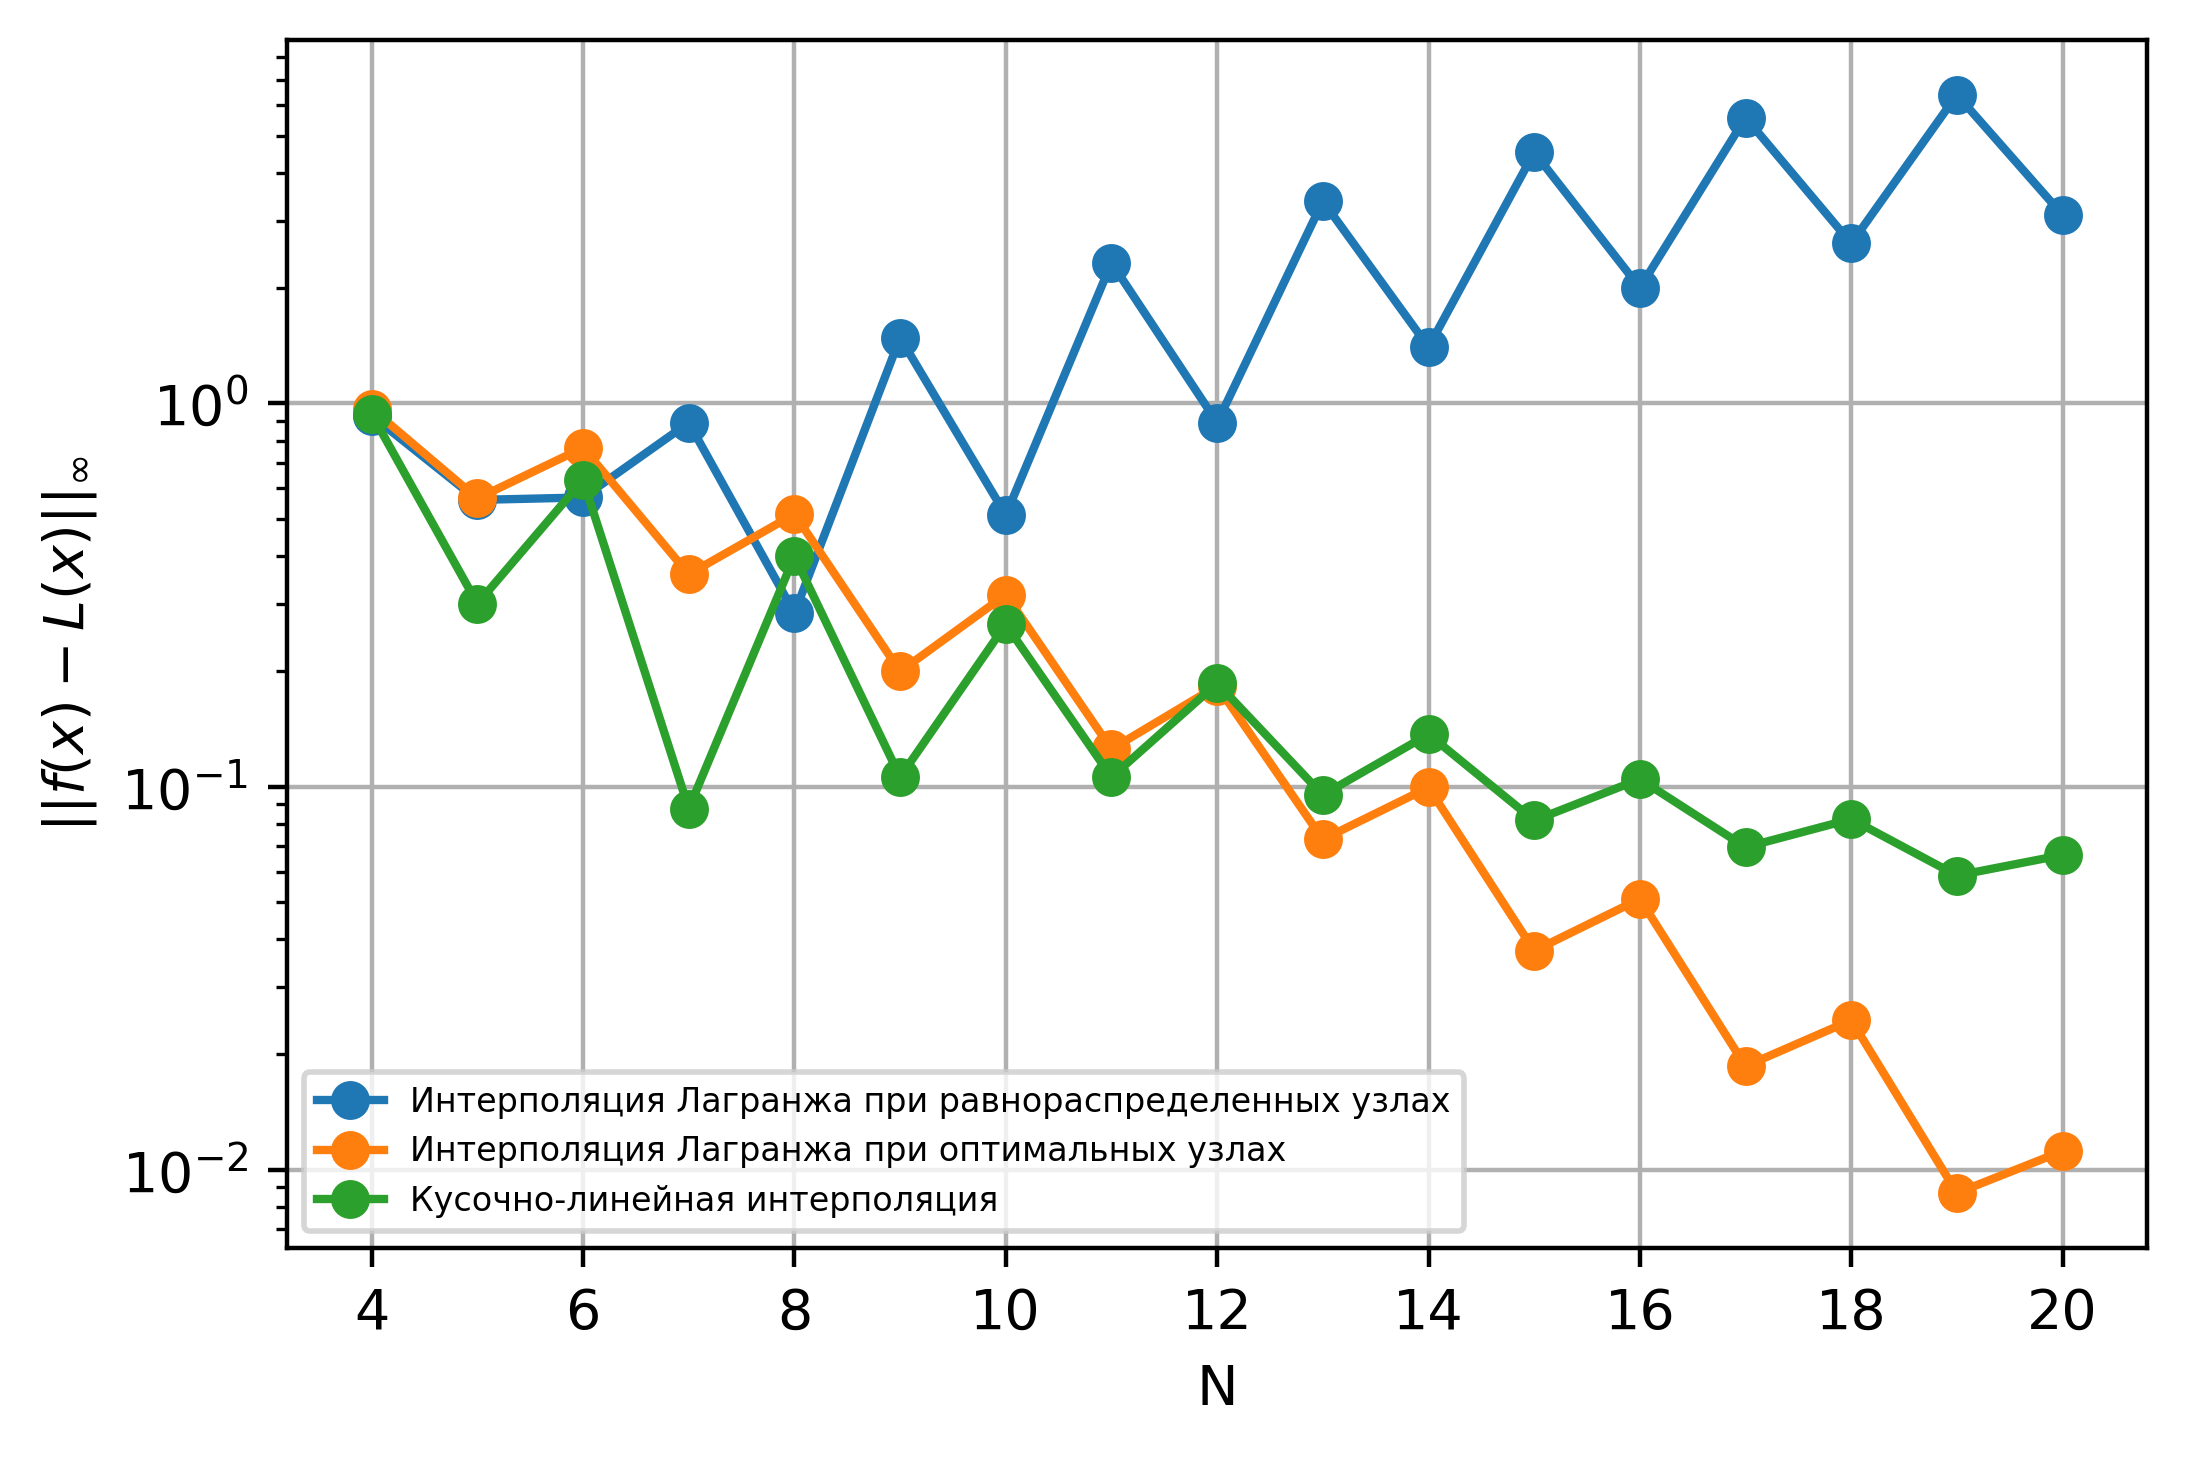

In [91]:
"""5"""
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=400)
 
axes.semilogy(n_arr, dist, '-o', label='Интерполяция Лагранжа при равнораспределенных узлах')
axes.semilogy(n_arr, dist_opt, '-o', label='Интерполяция Лагранжа при оптимальных узлах')
axes.semilogy(n_arr, dist_kl, '-o', label='Кусочно-линейная интерполяция')
 
axes.set_xlabel('N')
axes.set_ylabel('$||f(x) - L(x)||_{∞}$')
axes.legend(loc="best", prop={'size': 6})
 
axes.grid()
plt.show()

In [92]:
"""6"""
def square_trap(x1, x2, y1, y2):
    return (x2 - x1) * (y1 + y2) / 2

def err(x_nodes, y_nodes, x):
    sym_sq = 0
    for i in range(x_nodes.size - 1):
        if x_nodes[i+1] < -x  or  x_nodes[i] > x:
            continue
        elif x_nodes[i] < -x:
            y1 = L_kl([-x], x_nodes, y_nodes)[0]
            sym_sq += square_trap(-x, x_nodes[i+1], y1, y_nodes[i+1])
        elif x_nodes[i+1] > x:
            y2 = L_kl([x], x_nodes, y_nodes)[0]
            sym_sq += square_trap(x_nodes[i], x, y_nodes[i], y2)
        else:
            sym_sq += square_trap(x_nodes[i], x_nodes[i+1], y_nodes[i], y_nodes[i+1])
    return sym_sq / np.sqrt(np.pi)

for N in range(3, 10, 2):
    x_nodes = np.linspace(-5, 5, N)
    y_nodes = f(x_nodes)
    print(err(x_nodes, y_nodes, 2))

    

1.8054066673590887
1.3557976278988975
1.0198297216873808
0.9777263842009092
